In [1]:
import networkx as nx
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

%matplotlib inline

## 初步创建图形

In [2]:
G= nx.Graph()

### 1.添加节点与边

In [3]:
nodes = [1,2,3,4,5,6,7,8]
edges = [(1,2),(2,3),(2,8),(3,6),(3,7),(4,7),(5,7)]

In [4]:
G.add_nodes_from(nodes)

In [5]:
G.nodes(data=True)

NodeDataView({1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}})

In [6]:
G.add_edges_from(edges)

In [7]:
G.edges(data=True)

EdgeDataView([(1, 2, {}), (2, 3, {}), (2, 8, {}), (3, 6, {}), (3, 7, {}), (4, 7, {}), (5, 7, {})])

### 2.图形初步显示

https://networkx.github.io/documentation/stable/reference/drawing.html

C:\Users\workload\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


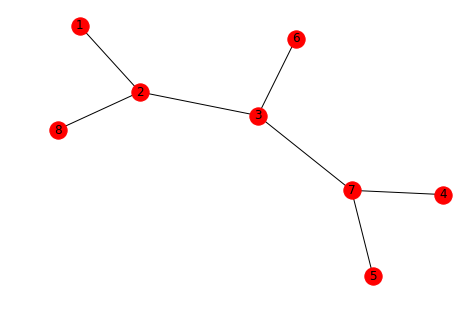

In [8]:
nx.draw(G,with_labels=True)
plt.show()

### 定义pos，每个节点的位置不变

In [9]:
pos = nx.spring_layout(G)

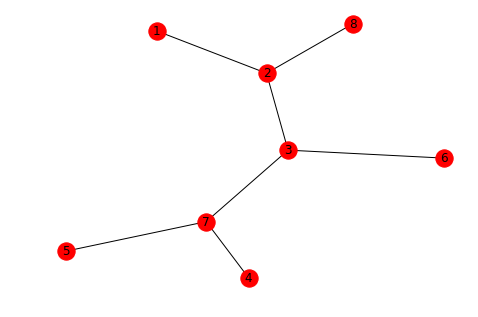

In [10]:
nx.draw(G,pos=pos, with_labels=True)

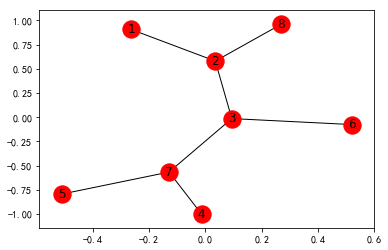

In [11]:
nx.draw_networkx(G,pos=pos, with_labels=True)

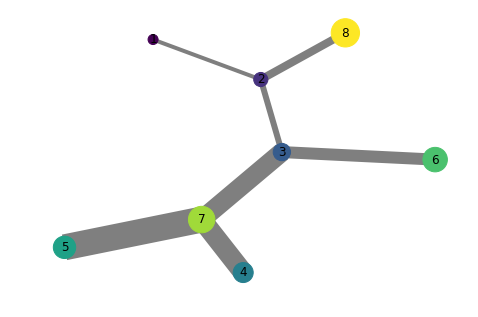

In [12]:
nx.draw(G,pos=pos, with_labels=True, width=0, node_size=0)
nx.draw_networkx_nodes(G, pos=pos, 
                       node_list=[1,2,3,4,5,6,7,8], 
                       node_size=[100,200,300,400,500,600,700,800], 
                      node_color=G.nodes())
nx.draw_networkx_edges(G, pos=pos, 
                       edge_list=[1,2,3,4,5,6,7,8], 
                       width=[4,6,8,12,19,20,26,44],alpha=0.5)

### 思考？如果节点的位置（pos）就是经纬度坐标，就可以进行实际的空间关联网络分析

In [13]:
pos

{1: array([-0.26457149,  0.90720535]),
 2: array([0.03502426, 0.57994514]),
 3: array([ 0.09364306, -0.01390583]),
 4: array([-0.01391126, -1.        ]),
 5: array([-0.51085882, -0.79355173]),
 6: array([ 0.51986236, -0.07557285]),
 7: array([-0.12942593, -0.56611336]),
 8: array([0.27023782, 0.96199329])}

In [14]:
type(pos)

dict

### 异常强大的算法

#### 平均最短路径长度
https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.average_shortest_path_length.html?highlight=average_shortest_path_length#networkx.algorithms.shortest_paths.generic.average_shortest_path_length

In [15]:
nx.average_shortest_path_length(G)

2.3214285714285716

https://networkx.github.io/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html?highlight=from_pandas_edgelist#networkx.convert_matrix.from_pandas_edgelist

In [4]:
# 获得需要去进行图形化的数据
import pandas as pd
city_net = pd.read_excel('./file/city_net/city_net.xlsx')
city_net.head(2)

,Unnamed: 0,SSGS_city,ZGS_city,count
0,1136,北京市,深圳市,885
1,952,北京市,上海市,423


#### 特别注意 ：2.0以后版本，from_pandas_dataframe 改为  from_pandas_edgelist

In [5]:
# 数据转换为networkx图形对象
GA = nx.from_pandas_edgelist(city_net, source='SSGS_city', target='ZGS_city', edge_attr='count')

In [6]:
GA

In [7]:
# 读取城市的坐标
net_use = pd.read_csv('./file/city_net/coord.csv')
net_use = net_use[['city_01','lng_gis','lat_gis']]

In [8]:
# pandas对象转换为重点对象
dict_city = net_use.set_index('city_01').T.to_dict('list')
dict_city

C:\Users\cc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  


{'巴彦淖尔市': [463639.9797319863, 4590537.150170258],
 '徐州市': [1377000.5124964078, 3844639.1988461073],
 '长沙市': [1006226.8914717148, 3134531.9732757118],
 '达州市': [465960.5191378481, 3471517.9060247415],
 '酒泉市': [-518952.2479404904, 4525784.312036776],
 '海北藏族自治州': [-176840.68802754828, 4213286.4542397205],
 '汕尾市': [1275198.7912896154, 2560529.640117492],
 '濮阳市': [1158378.481037496, 3988775.4320588126],
 '十堰市': [729529.7772638334, 3595052.174966512],
 '昌吉回族自治州': [-1045043.3891905913, 5099358.438398813],
 '梅州市': [1322712.46573633, 2701671.5775045943],
 '池州市': [1402938.014846212, 3388913.124205448],
 '常州市': [1607449.3500287558, 3559782.609309772],
 '黔南布依族苗族自治州': [424898.01067631243, 2878365.1529018683],
 '恩施土家族苗族自治州': [648967.3575939757, 3342272.1214271067],
 '阜新市': [1652002.7651480124, 4778063.311686257],
 '漯河市': [1047617.3870579944, 3741047.853012023],
 '九江市': [1223711.8153802229, 3268512.14204643],
 '淮北市': [1311502.3134922408, 3767882.773956482],
 '宜春市': [1184956.5037756674, 3152185.6650294

C:\Users\cc\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


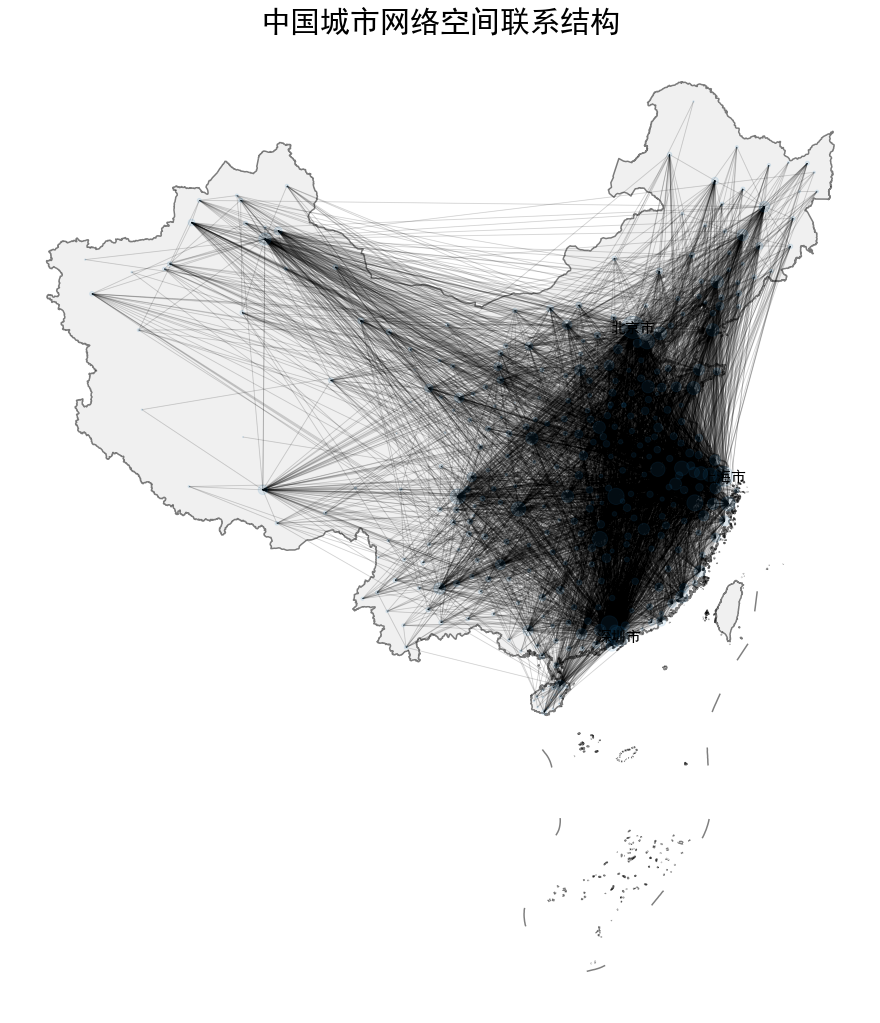

<Figure size 432x288 with 0 Axes>

In [12]:
city_lst = []
for i in city_net['SSGS_city']:
    city_lst.append(i)
for i in city_net['ZGS_city']:
    city_lst.append(i)

dic = {}
nodelst = []
sizes = []
for i in city_lst:
    if city_lst.count(i)>0:
        dic[i] = city_lst.count(i)
for m,k in dic.items():
    nodelst.append(m)
    sizes.append(k)

    
fig, ax = plt.subplots(figsize=(18,18))
ax.set_title('中国城市网络空间联系结构',size=30)


country = gpd.GeoDataFrame.from_file('./file/shp/china.shp')
country = country.to_crs({'init':'epsg:2381'})
country.plot(ax=ax,color='#e2e2e2',alpha=0.5)
country02 = gpd.GeoDataFrame.from_file('./file/shp/china_arc2.shp')
country02 = country02.to_crs({'init':'epsg:2381'})
country02.plot(ax=ax,color='black',alpha=0.5)  
      
    
GA = nx.from_pandas_edgelist(city_net, source="SSGS_city", target="ZGS_city", edge_attr='count')
pos = dict_city


labels = {}    
for m,k in dic.items():
    if k > 300:
        labels[m] = m


edges = GA.edges() 

nx.draw(GA,pos, with_labels=False, alpha=0.1,
        nodelist = nodelst, node_size=sizes,font_family='SimHei')

nx.draw_networkx_labels(GA,pos,labels,
                        font_family='SimHei',font_size=15,font_color='black')

nx.draw_networkx_edges(GA, pos, width=0.5, alpha=0.1)


plt.show()
plt.savefig('./networkx.png',dpi=300)